In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math

In [139]:
data = pd.read_csv('https://raw.githubusercontent.com/shreyas-jk/Product-Demand-Forecasting-Using-ML/main/data.csv')

# Exploratory Data Analysis

In [140]:
data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [142]:
data.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [143]:
data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [144]:
null_index = data[data['total_price'].isnull()].index.tolist()

In [145]:
null_index

[136949]

In [146]:
print(data.iloc[[136949]])

        record_ID      week  store_id  sku_id  total_price  base_price  \
136949     193915  23/04/13      9436  245338          NaN    469.5375   

        is_featured_sku  is_display_sku  units_sold  
136949                0               0           1  


In [147]:
data.drop([136949],inplace=True)

In [148]:
data = data.drop(['record_ID','store_id','sku_id','is_featured_sku', 'is_display_sku'],axis=1)

In [149]:
data

,week,total_price,base_price,units_sold
0,17/01/11,99.0375,111.8625,20
1,17/01/11,99.0375,99.0375,28
2,17/01/11,133.9500,133.9500,19
3,17/01/11,133.9500,133.9500,44
4,17/01/11,141.0750,141.0750,52
...,...,...,...,...
150145,09/07/13,235.8375,235.8375,38
150146,09/07/13,235.8375,235.8375,30
150147,09/07/13,357.6750,483.7875,31
150148,09/07/13,141.7875,191.6625,12


In [150]:

data[["day", "month", "year"]] = data["week"].str.split("/", expand = True)
data = data.drop(['week'],axis=1)

In [151]:
data['day'] = pd.to_numeric(data['day'],errors='coerce')
data['month'] = pd.to_numeric(data['month'],errors='coerce')
data['year'] = pd.to_numeric(data['year'],errors='coerce')
data

,total_price,base_price,units_sold,day,month,year
0,99.0375,111.8625,20,17,1,11
1,99.0375,99.0375,28,17,1,11
2,133.9500,133.9500,19,17,1,11
3,133.9500,133.9500,44,17,1,11
4,141.0750,141.0750,52,17,1,11
...,...,...,...,...,...,...
150145,235.8375,235.8375,38,9,7,13
150146,235.8375,235.8375,30,9,7,13
150147,357.6750,483.7875,31,9,7,13
150148,141.7875,191.6625,12,9,7,13


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150149 entries, 0 to 150149
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   total_price  150149 non-null  float64
 1   base_price   150149 non-null  float64
 2   units_sold   150149 non-null  int64  
 3   day          150149 non-null  int64  
 4   month        150149 non-null  int64  
 5   year         150149 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 8.0 MB


In [153]:
data['demand'] = data['units_sold']
data = data.drop(['units_sold'],axis=1)


In [154]:
data['day_1'] = data['demand'].shift(-1)
data['day_2'] = data['demand'].shift(-2)
data['day_3'] = data['demand'].shift(-3)
data['day_4'] = data['demand'].shift(-4)
data['day_5'] = data['demand'].shift(-5)
data['day_6'] = data['demand'].shift(-6)
data['day_7'] = data['demand'].shift(-7)
data['day_8'] = data['demand'].shift(-8)
data['day_9'] = data['demand'].shift(-9)
data['day_10'] = data['demand'].shift(-10)


In [155]:
data

,total_price,base_price,day,month,year,demand,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10
0,99.0375,111.8625,17,1,11,20,28.0,19.0,44.0,52.0,18.0,47.0,50.0,82.0,99.0,120.0
1,99.0375,99.0375,17,1,11,28,19.0,44.0,52.0,18.0,47.0,50.0,82.0,99.0,120.0,40.0
2,133.9500,133.9500,17,1,11,19,44.0,52.0,18.0,47.0,50.0,82.0,99.0,120.0,40.0,68.0
3,133.9500,133.9500,17,1,11,44,52.0,18.0,47.0,50.0,82.0,99.0,120.0,40.0,68.0,87.0
4,141.0750,141.0750,17,1,11,52,18.0,47.0,50.0,82.0,99.0,120.0,40.0,68.0,87.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,9,7,13,38,30.0,31.0,12.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
150146,235.8375,235.8375,9,7,13,30,31.0,12.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150147,357.6750,483.7875,9,7,13,31,12.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150148,141.7875,191.6625,9,7,13,12,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
 data = data.dropna()

# Data Visualization

No handles with labels found to put in legend.


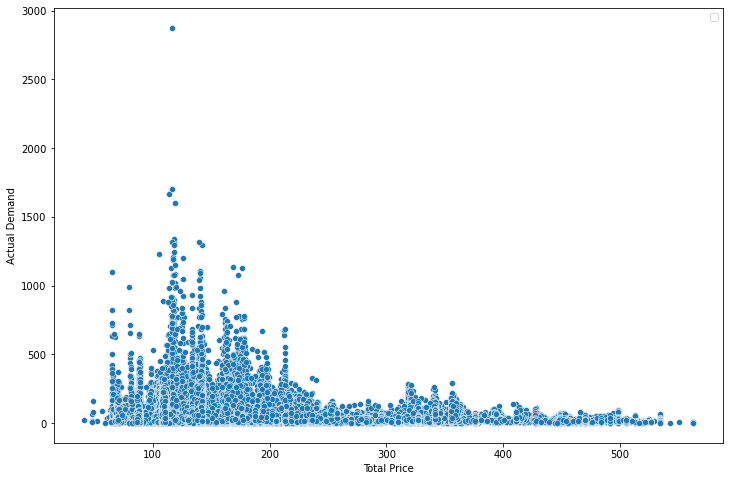

In [157]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_price',y='demand',data=data)
plt.xlabel('Total Price')
plt.ylabel('Actual Demand')
plt.legend()
plt.show()

No handles with labels found to put in legend.


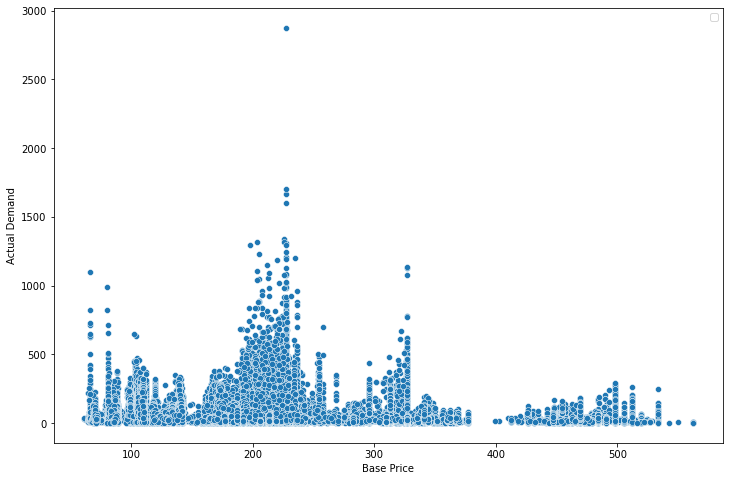

In [158]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='base_price',y='demand',data=data)
plt.xlabel('Base Price')
plt.ylabel('Actual Demand')
plt.legend()
plt.show()

No handles with labels found to put in legend.


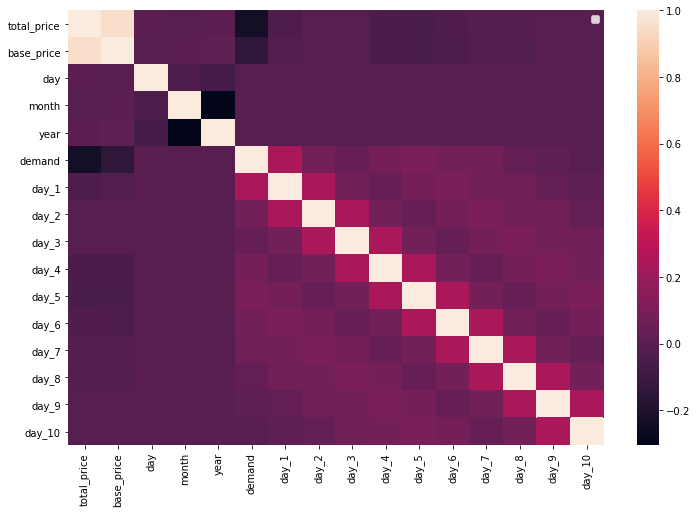

In [159]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data.corr())
plt.legend()
plt.show()

In [160]:
X = data.drop(['demand'],axis=1)
y = data['demand']

In [161]:
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

# Train -Test Split

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.05, random_state=100)


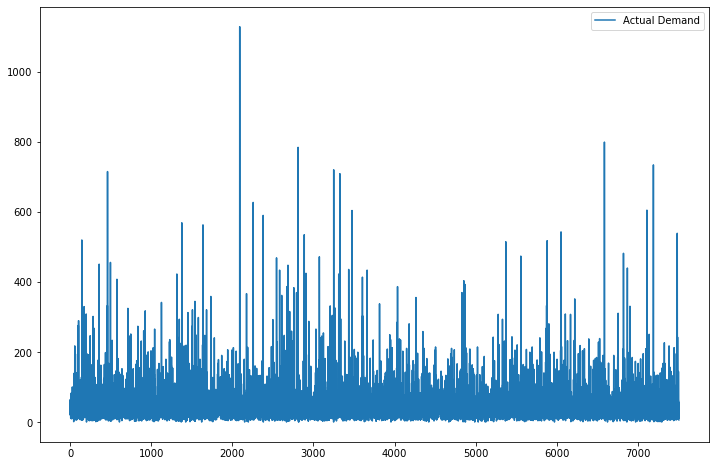

In [163]:
plt.figure(figsize=(12,8))
plt.plot(y_cv, label='Actual Demand')
plt.legend()
plt.show()

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [165]:
scaler.fit_transform(X_train)

array([[ 1.6357615 ,  2.057069  ,  1.3796641 , ..., -0.625589  ,
        -0.29330093, -0.6098536 ],
       [-0.35184568,  0.07123785,  1.3796641 , ...,  0.53604823,
         0.26902625, 12.853186  ],
       [ 0.03463349, -0.08300152, -1.0149249 , ...,  0.50285864,
         0.12017493, -0.0779805 ],
       ...,
       [-0.6417051 , -0.12798801, -1.6990932 , ...,  0.7185912 ,
        -0.04521541,  0.80293447],
       [-1.338748  , -1.2012364 ,  0.3534116 , ...,  0.17096226,
        -0.6240816 , -0.09460154],
       [-0.855649  , -0.7770784 , -1.242981  , ..., -0.07795999,
        -0.6571597 , -0.84254813]], dtype=float32)

In [166]:
scaler.fit_transform(X_cv)

array([[-0.47898796, -0.37805066, -0.6583922 , ..., -0.6120595 ,
        -0.48163822, -0.6118959 ],
       [ 0.2632109 ,  0.12755254,  0.3735991 , ...,  0.09689186,
         1.5126175 ,  0.58382964],
       [ 0.28363836,  0.14651263, -0.4290608 , ..., -0.5276605 ,
         0.20728649, -0.26792005],
       ...,
       [-0.89434695, -0.9468543 ,  0.71759623, ..., -0.7977372 ,
        -0.84423023, -0.6118959 ],
       [ 0.14064585,  0.01379171, -1.5757178 , ..., -0.4939009 ,
        -0.11904628, -0.23516044],
       [ 0.692188  ,  0.52571493, -0.4290608 , ..., -0.2575838 ,
         0.5336192 , -0.23516044]], dtype=float32)

# Neural Network Model

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [168]:
model = Sequential()

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(15,activation='relu'))



model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [169]:
model.fit(x=X_train,y=y_train,validation_data=(X_cv,y_cv),batch_size=128,epochs=250)

Epoch 1/250
1115/1115 [==============================] - 1s 1ms/step - loss: 3520.7720 - val_loss: 3137.4128
Epoch 2/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2934.0076 - val_loss: 2645.0593
Epoch 3/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2709.2378 - val_loss: 2683.7610
Epoch 4/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2631.3933 - val_loss: 2542.2473
Epoch 5/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2583.4028 - val_loss: 2643.5166
Epoch 6/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2548.4275 - val_loss: 2631.8684
Epoch 7/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2513.2817 - val_loss: 2436.2827
Epoch 8/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2529.5312 - val_loss: 2715.4995
Epoch 9/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2496.7336 - val_loss: 2613.4092
Epoch 10/250
1115/1

1115/1115 [==============================] - 1s 1ms/step - loss: 2230.3535 - val_loss: 2370.7559
Epoch 76/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2215.2080 - val_loss: 2216.6360
Epoch 77/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2198.5889 - val_loss: 2463.4177
Epoch 78/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2169.7043 - val_loss: 2305.8528
Epoch 79/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2191.1179 - val_loss: 2225.7390
Epoch 80/250
1115/1115 [==============================] - 1s 991us/step - loss: 2186.7827 - val_loss: 2400.5454
Epoch 81/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2195.5564 - val_loss: 2481.7390
Epoch 82/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2184.7656 - val_loss: 2504.0042
Epoch 83/250
1115/1115 [==============================] - ETA: 0s - loss: 2226.77 - 1s 991us/step - loss: 2223.7747 - val_loss: 231

Epoch 149/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2164.3494 - val_loss: 2529.4390
Epoch 150/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2180.6047 - val_loss: 2420.2886
Epoch 151/250
1115/1115 [==============================] - 1s 996us/step - loss: 2169.9846 - val_loss: 2383.9465
Epoch 152/250
1115/1115 [==============================] - 1s 986us/step - loss: 2162.0488 - val_loss: 2393.5420
Epoch 153/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2143.4319 - val_loss: 2294.8259
Epoch 154/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2141.5430 - val_loss: 2252.2505
Epoch 155/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2152.1802 - val_loss: 2388.9214
Epoch 156/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2145.8477 - val_loss: 2377.0913
Epoch 157/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2137.5176 - val_loss: 2311.90

1115/1115 [==============================] - 1s 1ms/step - loss: 2143.0564 - val_loss: 2501.8728
Epoch 223/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2147.3757 - val_loss: 2295.3965
Epoch 224/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2131.3840 - val_loss: 2333.4871
Epoch 225/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2139.5256 - val_loss: 2264.5752
Epoch 226/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2151.0671 - val_loss: 2429.0149
Epoch 227/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2116.6384 - val_loss: 2215.7910
Epoch 228/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2150.2539 - val_loss: 2269.6790
Epoch 229/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2139.3850 - val_loss: 2364.9316
Epoch 230/250
1115/1115 [==============================] - 1s 1ms/step - loss: 2131.1074 - val_loss: 2420.2971
Epoch 231/250
1

In [170]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

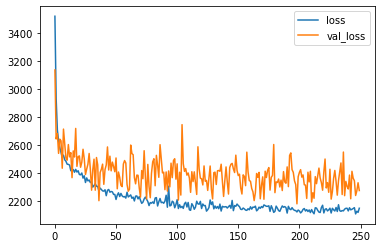

In [171]:
losses.plot()

# Predictions

In [172]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions_train = model.predict(X_train)
predictions_cv = model.predict(X_cv)

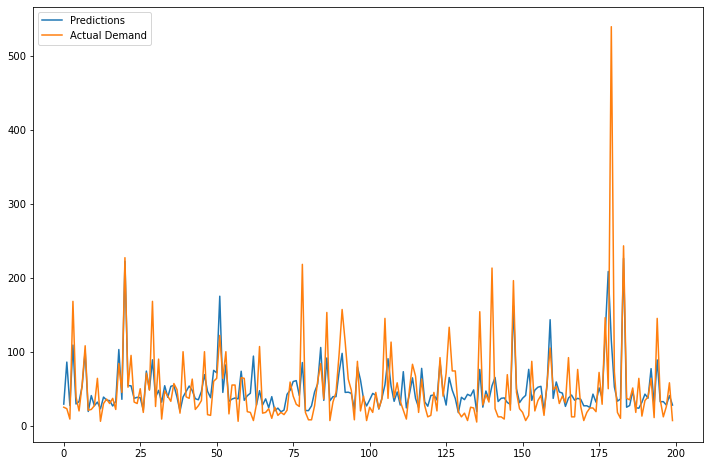

In [173]:
plt.figure(figsize=(12,8))
plt.plot(predictions[-200:], label='Predictions')
plt.plot(y_cv[-200:], label='Actual Demand')
plt.legend()
plt.show()

# Evaluation using Metrics

In [174]:
mae_train = mean_absolute_error(y_train,predictions_train)
mae_train

26.528719

In [175]:
mse_train = mean_squared_error(y_train,predictions_train)
mse_train

2432.0208

In [176]:
rmse_train = math.sqrt(mse_train)
rmse_train

49.31552242401093

In [177]:
mae_cv = mean_absolute_error(y_cv,predictions_cv)
mae

24.93765

In [178]:
mse_cv = mean_squared_error(y_cv,predictions_cv)
mse

1609.4462

In [179]:
rmse_cv = math.sqrt(mse_cv)
rmse_cv

47.718665581948905

# Thank You!!